# Исследование успешности компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В нашем распоряжении данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Изучение общей информации о данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/HP/Downloads/datasets/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим общую информацию о данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим данные на явные дубликаты.

In [4]:
print('Количество явных дубликатов: ', data.duplicated().sum())

Количество явных дубликатов:  0


### Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()

Определим в каких данных есть пропуски.

In [6]:
# определим в каких столбцах есть пропуски
print(data.isna().sum())
# также посмотрим объем пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


#### Преобразование данных

Преобразуем данные для удобства работы с ними при дальнейшем анализе.

In [7]:
# преобразуем тип данных в столбце year_of_release, предварительно заменив Nan на 0
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')

In [8]:
# преобразуем данные в столбце user_score
# в столбце есть аббревиатуру 'tbd' (To be determined - предстоит определить). заменим её на NaN
import numpy as np
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN
data['user_score'] = data['user_score'].astype('float64')

#####  Причины изменения типов данных в столбцах

Так как год выпуска это целое число, изменили тип данных в столбце `year_of_release` с float64 на int, предварительно заменив Nan на 0. Далее при работе с пропусками мы удалим эти 0.

Тип данных в столбце `user_score` заменили на float64, предварительно заменив аббревиатуру 'tbd' (To be determined - предстоит определить) на NaN, чтобы в дальнейшем использовать его в числовых операциях.

#### Пропуски

Пропуски, не влияющие на статистику удалим, а в данных которые нам нужны заполним по возможности.

In [9]:
# удалим пропуски в столбце name
data.dropna(subset=['name'], inplace=True)

In [10]:
# удалим пропуски (нули) в столбце year_of_release
data = data[data['year_of_release'] > 0]

Заполним пропуски в стобце `rating` на "Unknown"

In [11]:
data['rating'] = data['rating'].fillna('Unknown')
# посмотрим на новые данные столбца rating
data['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

##### Возможные причины пропусков в столбцах

- `name`. Удалили два пропуска, так как они не несли никакой информации.
- `year_of_release`. Пропуски в этом столбце скореее всего связаны с ошибкой при заполнении или технической ошибкой при выгрузке данных. Так как в данном столбце всего лишь 2% пропусков, мы их просто удалили.
- `rating`. Рейтинг ESRB предназначен для маркировки игр для США и Канады, для других регионов он не заполняется. ЧТобы игры без рейтинга не оказались полностью исключенными при дальнейшем анализе, поставим "заглушку" ввиде  "Unknown" на пропуски в рейтинге ESRB.
- `critic_score`, `user_score`. Нет оценок у игр, выпущенных в 90-х годах и ранее (скорее всего тогда просто не было ресурсов, где ставились оценки, или данные просто не сохранились). Также возможно еще не сформирован рейтинг у новых игр. Пропусков в этих столбцах слишком много, чтобы их удалить, но и информации для их заполнения у нас нет, поэтому оставляем как есть.

Добавим столбец с суммарными продажами во всех регионах.

In [12]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

Посмотрим общую информацю о таблице после предобработки данных.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


#### Вывод

В процессе предобработки данных мы скорректировали типы данных, обработали пропуски в нескольких столбцах, а также сформировали новый столбец (total_sales).

### Исследовательский анализ данных

#### Статистика выпуска игр по годам

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64


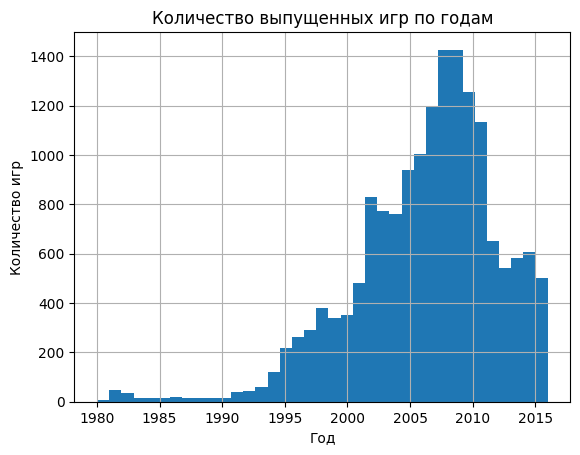

In [14]:
# посмотрим сколько игр выпускалось в разные годы
print(data['year_of_release'].value_counts())
data.hist(column='year_of_release', bins=37)

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Наибольшее число игр выпускалось с 2005 по 2011. До 1994 года выпускалось совсем мало игр, этот период не информативен для рассмотрения.

#### Статистика продаж по платформам

Рассмотрим, как менялись продажи по платформам. Определим платформы с наибольшими суммарными продажами и построим распределение по годам, а также средний характерный срок существования платформы.

##### Топ-10 платформ

In [15]:
# посмотрим рейтинг платформ по суммарным продажам (возьмем 10 лучших)
top_platforms = (data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum')
                 .sort_values(by='total_sales', ascending=False)
                 .reset_index())
# выделим топ10 в отдельную таблицу
top10_platforms = top_platforms.iloc[0:10]
top10_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


##### Pаспределение продаж для топ-10 платформ по года

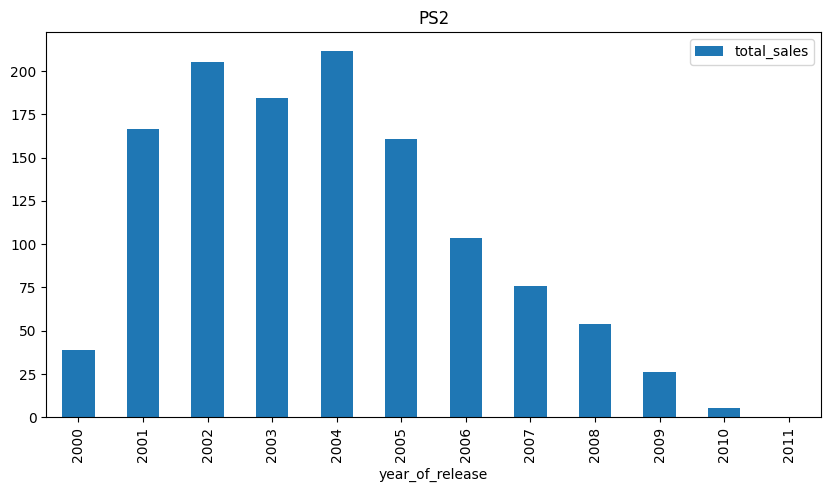

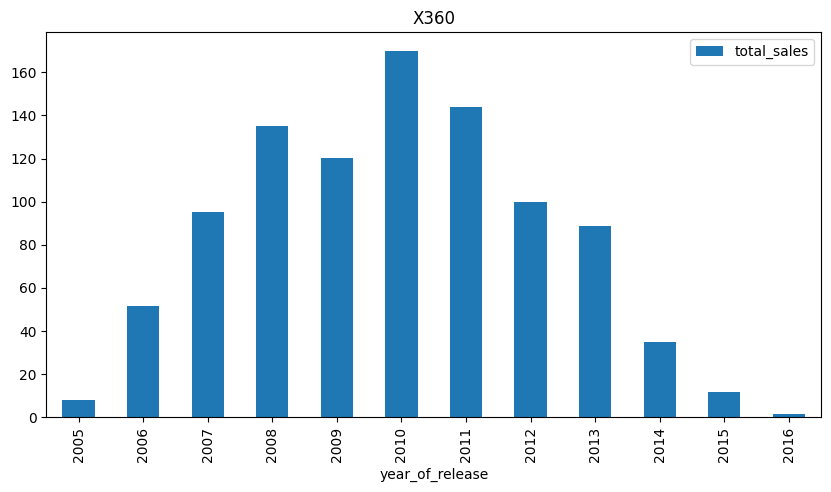

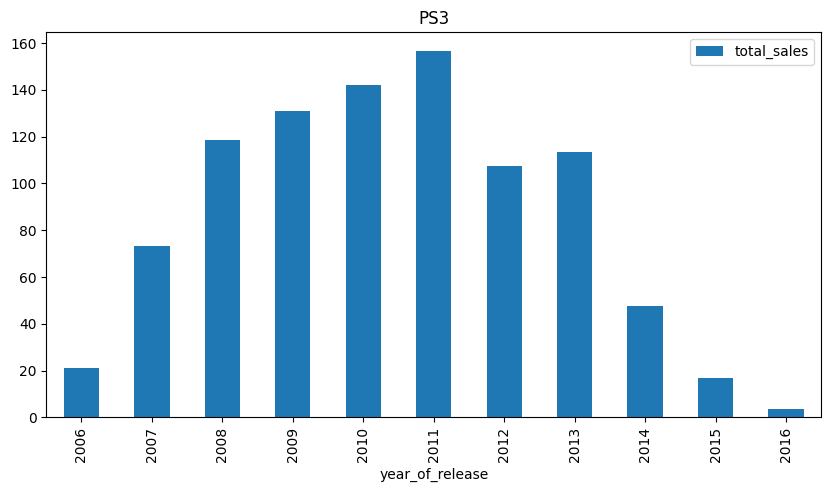

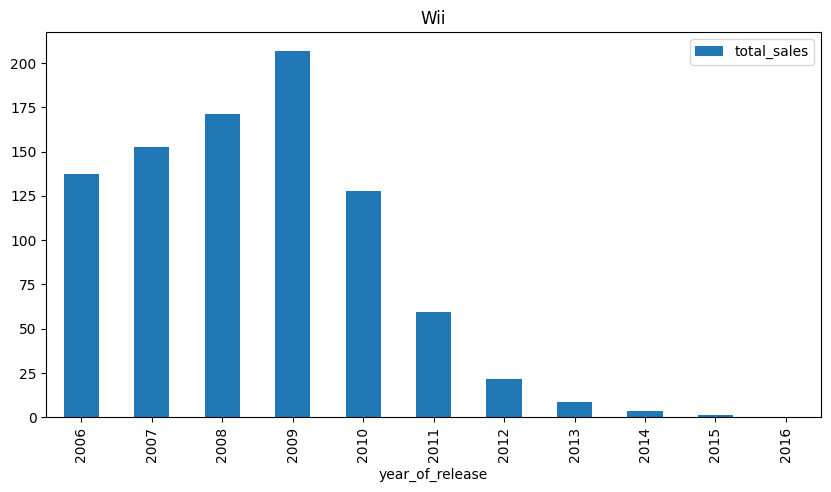

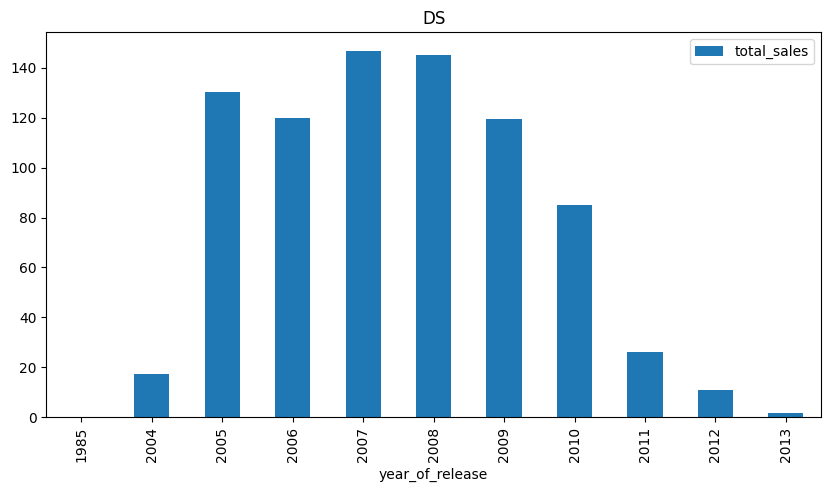

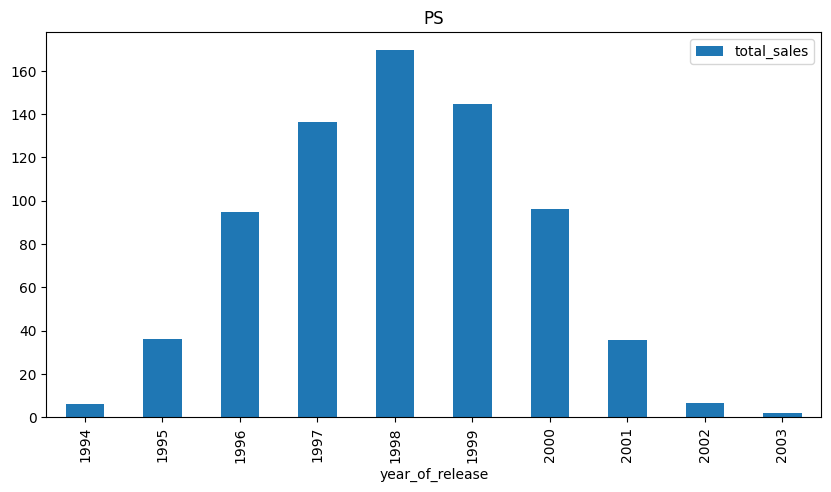

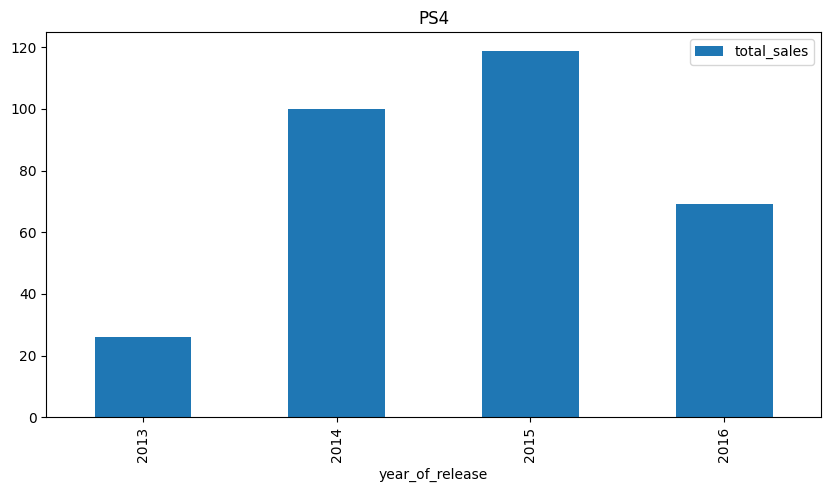

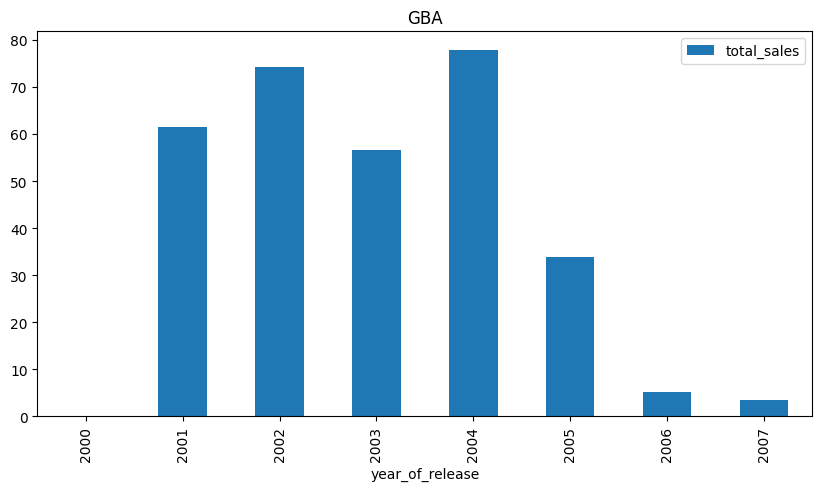

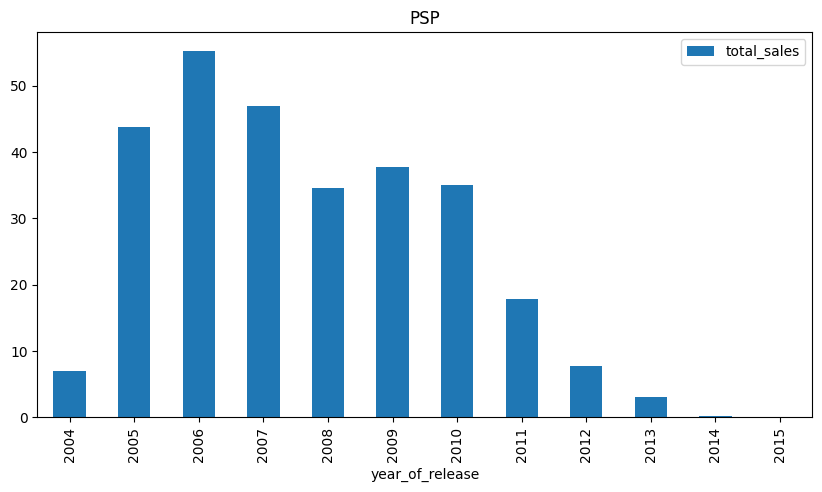

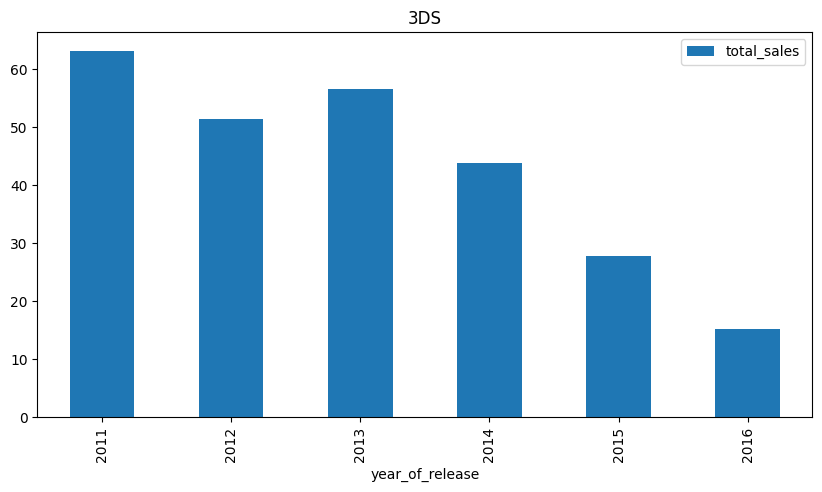

In [16]:
for platform in top10_platforms['platform']:
    (
        data[data['platform'] == platform]
    .pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').plot(kind='bar', figsize= (10,5))
    )
    plt.title(platform)
    plt.show()        

In [17]:
data_DS = data[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')]
data_DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


Средний срок жизни платформы - 10 лет.

Для построения прогноза на 2017 год возьмем актуальный период с 2013 по 2016 год.

In [18]:
# для дальнейших исследований отбросим данные до 2013 года
new_data = data[data['year_of_release'] >= 2013]

##### Графики продаж по годам для топ-10 платформ

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'PS4' 'GBA' 'PSP' '3DS']


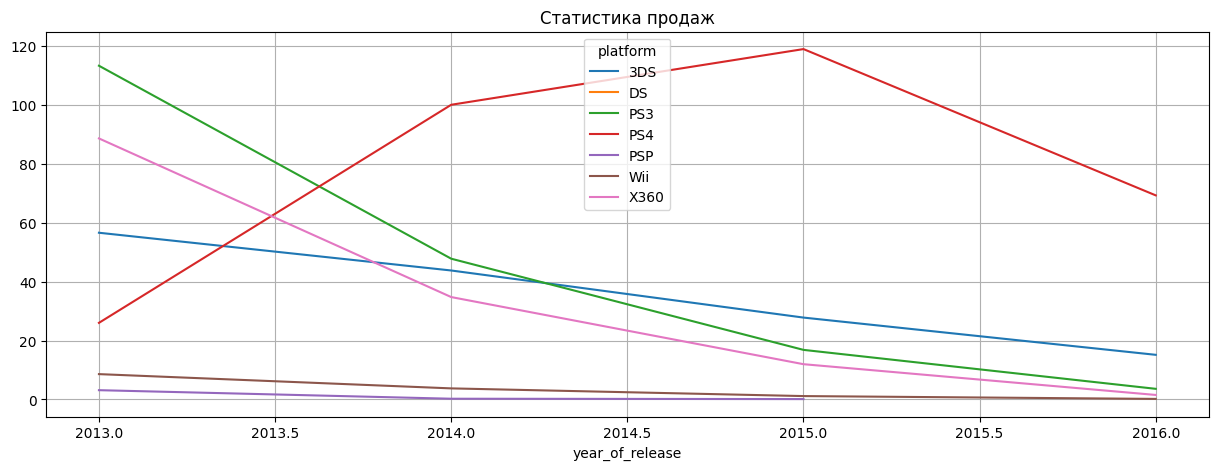

In [19]:
top10_platforms_name = top10_platforms['platform'].unique()
print(top10_platforms_name)

(new_data.query('platform in @top10_platforms_name')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc= 'sum')
 .plot(grid=True, figsize=(15,5), title='Статистика продаж')
)
plt.show()

За рассматриваемый период продажи упали на всех платформах, а на некоторых вообще прекратились. Судя по графикам перспективы есть только у платформ PS4 и 3DS.

##### Статистика продаж игр по платформам

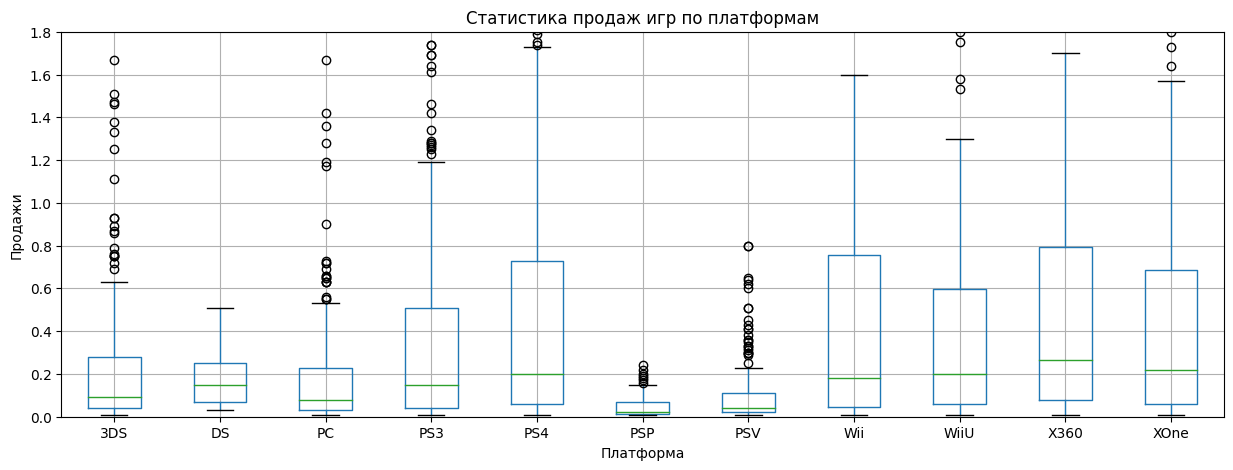

In [20]:
# построим диаграмму размаха ("ящик с усами") по глобальным продажам игр в разбивке по платформам
new_data.pivot_table(index='name', columns='platform', values='total_sales', aggfunc= 'sum').boxplot(figsize=(15,5))

plt.ylim(0, 1.8)
plt.title('Статистика продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.show()

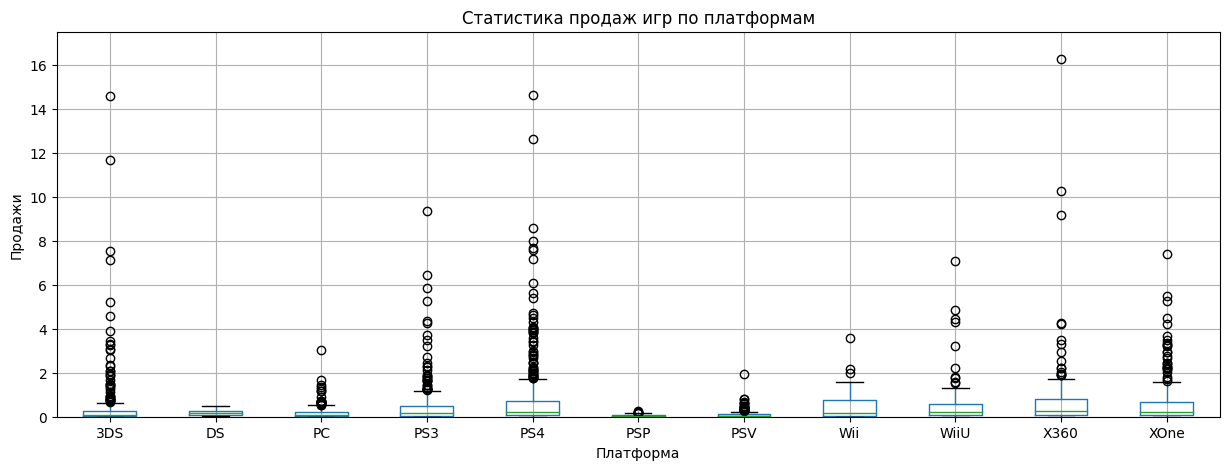

In [21]:
# посмотрим выбросы
new_data.pivot_table(index='name', columns='platform', values='total_sales', aggfunc= 'sum').boxplot(figsize=(15,5))

plt.ylim(0, 17.5)
plt.title('Статистика продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.show()

По "усам" видно, что наиболее успешны по продажам платформы:PS4, X360, WiiU и XOne.

##### Влияние  на продажи оценок критиков и пользователей 

Рассмотрим, как влияют на продажи внутри разных платформ отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитайем корреляцию между отзывами и продажами. 

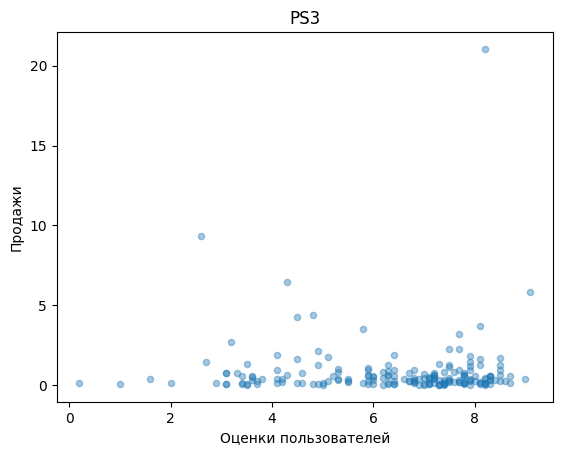

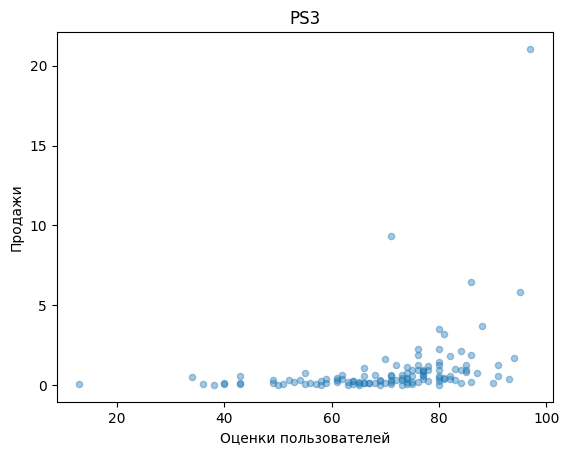

In [22]:
# для платформы PS3 построим графики зависимости продаж от оценок пользователей и критиков
PS3 = new_data.query('platform == "PS3"')
PS3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, title='PS3')

plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show() 

PS3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, title='PS3')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()         

In [23]:
# посчитаем коэффициент корреляции Пирсона
print('Коэффициент Пирсона по оценкам пользователей: ',PS3['user_score'].corr(PS3['total_sales']))
print('Коэффициент Пирсона по оценкам критиков: ',PS3['critic_score'].corr(PS3['total_sales']))

Коэффициент Пирсона по оценкам пользователей:  0.002394402735756673
Коэффициент Пирсона по оценкам критиков:  0.33428533933719196


По диаграммам рассеяния видна прямая зависимость: чем больше рейтинг игры, тем выше её продажи. При этом по коэффициентам Пирсона видно, что зависимость от оценок критиков сильней, чем от оценок пользователей. 

Посмотрим на эти зависимости для топ-5 платформ.

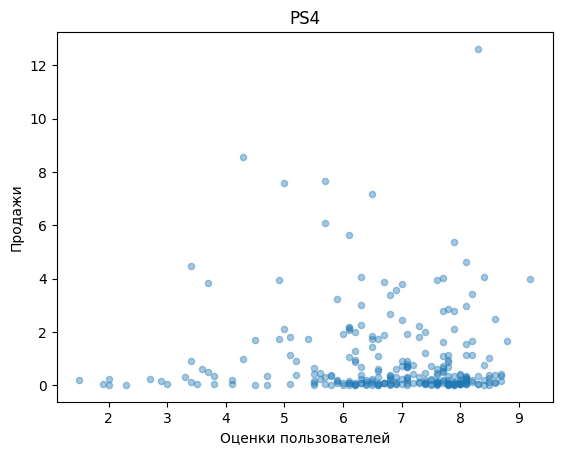

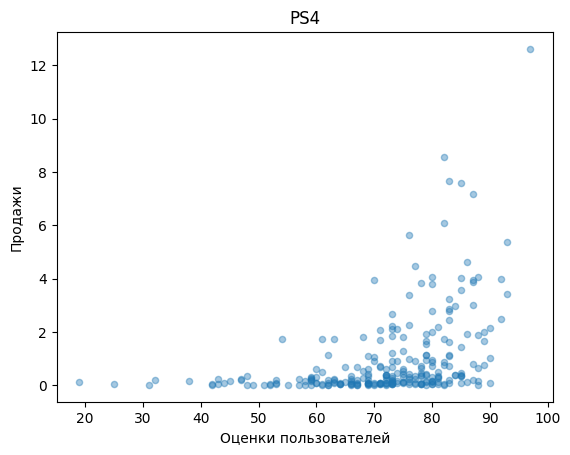

Коэффициент Пирсона по оценкам пользователей для PS4 : -0.031957110204556466
Коэффициент Пирсона по оценкам критиков для PS4 : 0.4065679020617815


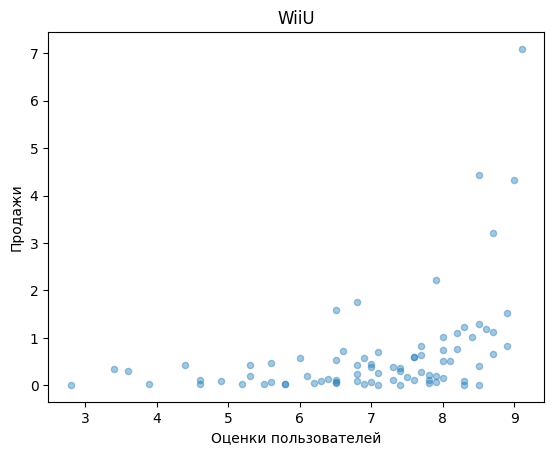

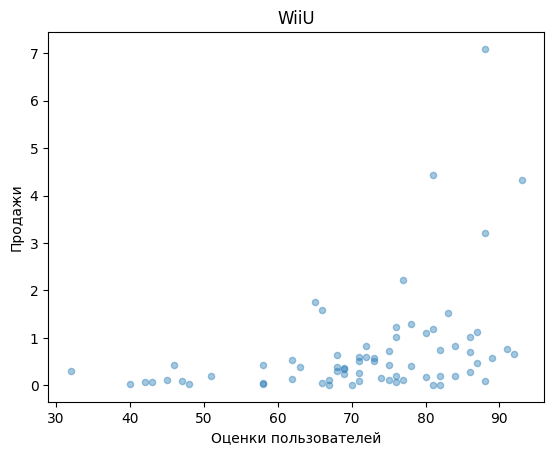

Коэффициент Пирсона по оценкам пользователей для WiiU : 0.41933048192661837
Коэффициент Пирсона по оценкам критиков для WiiU : 0.3764149065423912


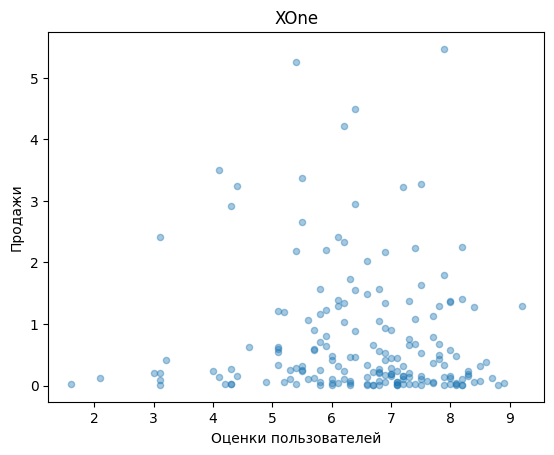

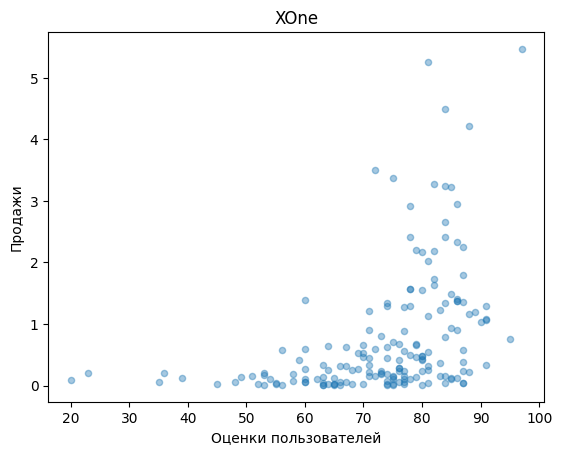

Коэффициент Пирсона по оценкам пользователей для XOne : -0.06892505328279419
Коэффициент Пирсона по оценкам критиков для XOne : 0.4169983280084016


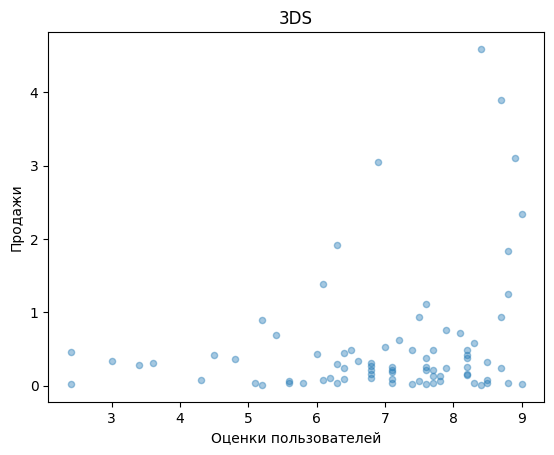

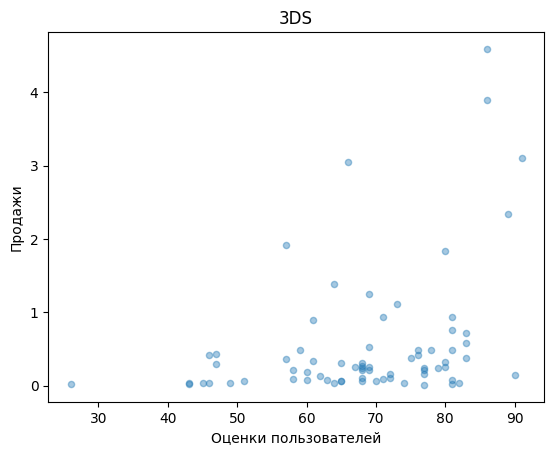

Коэффициент Пирсона по оценкам пользователей для 3DS : 0.2415041177356302
Коэффициент Пирсона по оценкам критиков для 3DS : 0.3570566142288104


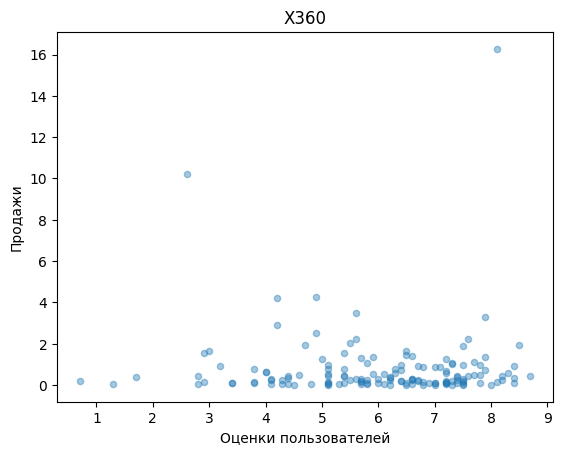

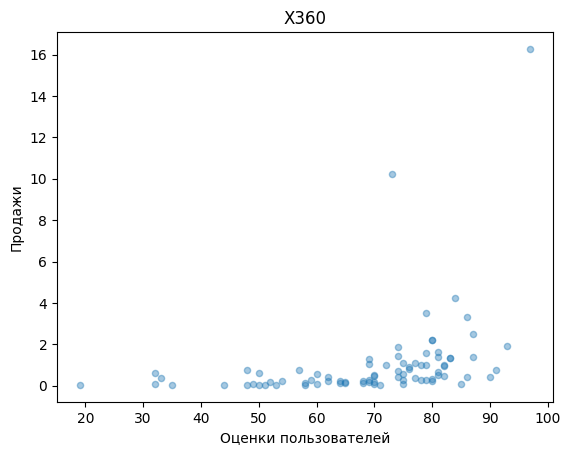

Коэффициент Пирсона по оценкам пользователей для X360 : -0.011742185147181365
Коэффициент Пирсона по оценкам критиков для X360 : 0.3503445460228666


In [24]:
top5_platforms = ['PS4', 'WiiU', 'XOne', '3DS', 'X360']

for name in top5_platforms:
    df = new_data.query('platform == @name')
    df.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4)
    plt.title(name)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.show()
    df.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4)
    plt.title(name)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.show()
    print('Коэффициент Пирсона по оценкам пользователей для',name,':',df['user_score'].corr(df['total_sales']))
    print('Коэффициент Пирсона по оценкам критиков для',name,':',df['critic_score'].corr(df['total_sales']))   

Мы видим, что пользователи американских платформ PS3, PS4, X360 и XOne при покупке игр больше ориентируются на оценки критиков, а пользователи японских платформ WiiU и 3DS примерно одинаково ориентируются и на оценки критиков и на оценки других пользователей.

##### Распределение игр по жанрам

Рассмотрим общее распределение игр по жанрам. Определим наиболее прибыльные жанры.

Общее распределение игр по жанрам.

In [25]:
new_data['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

Рассмотрим прибыльность игр по жанрам.

              total_sales
genre                    
Action             321.87
Shooter            232.98
Sports             150.65
Role-Playing       145.89
Misc                62.82
Platform            42.63
Racing              39.89
Fighting            35.31
Adventure           23.64
Simulation          21.76
Strategy            10.08
Puzzle               3.17


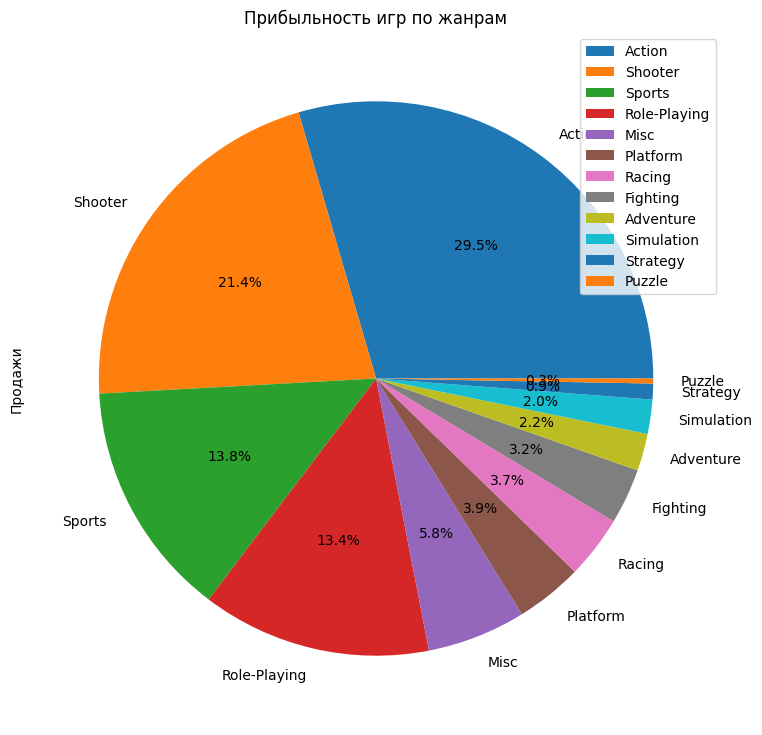

In [26]:
top_genre = (
    new_data.pivot_table(index='genre',values='total_sales',aggfunc= 'sum').sort_values(by='total_sales',ascending=False)
)
top_genre.plot(kind='pie', y='total_sales', figsize=(9,9), autopct='%1.1f%%')

plt.title('Прибыльность игр по жанрам')
plt.ylabel('Продажи')

print(top_genre)

Посмотрим прибыльность по жанрам по медианным значениям.

              total_sales
genre                    
Shooter             0.450
Sports              0.240
Platform            0.225
Role-Playing        0.125
Fighting            0.125
Racing              0.120
Action              0.110
Simulation          0.100
Misc                0.100
Strategy            0.080
Puzzle              0.060
Adventure           0.030


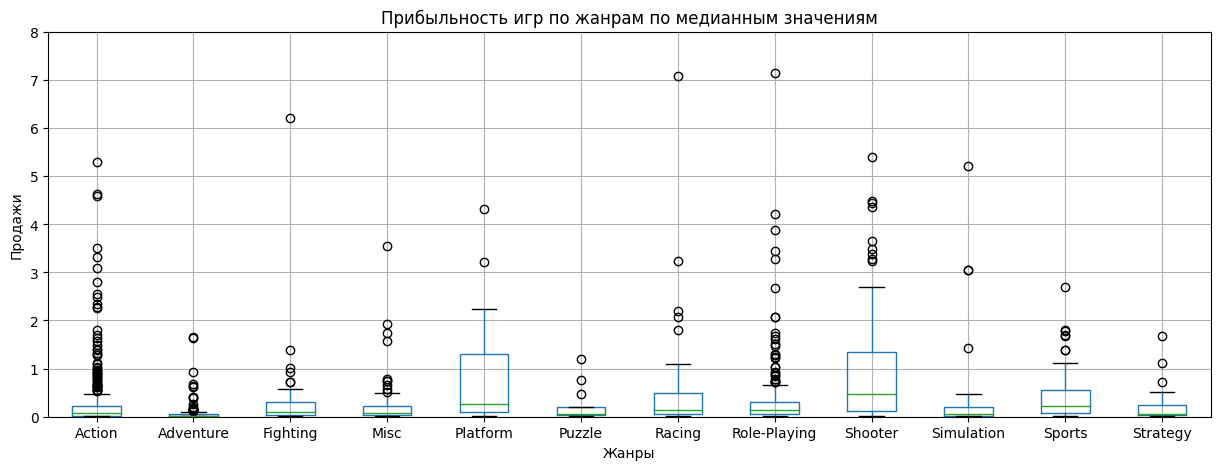

In [27]:
top_genre = (
    new_data.pivot_table(index='genre',values='total_sales',aggfunc= 'median').sort_values(by='total_sales',ascending=False)
)
print(top_genre)

new_data.pivot_table(index='name', columns='genre', values='total_sales', aggfunc= 'median').boxplot(figsize=(15,5))
plt.ylim(0, 8)
plt.title('Прибыльность игр по жанрам по медианным значениям')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

#### Вывод

В данном разделе выбран актуальный период (2013-2016 гг) для прогнозов на 2017 год. В ходе исследования данных за выбранный актуальный период установлено,что за рассматриваемый период продажи упали на всех платформах или вообще прекратились. При этом, есть перспективы у двух относительно новых платформ PS4 и 3DS.  
При покупке игр пользователи американских платформамериканских платформ PS3, PS4, X360 и XOne больше ориентируются на оценки критиков, пользователи японских платформ WiiU и 3DS примерно одинаково ориентируются и на оценки критиков и на оценки других пользователей.
Наиболее популярные жанры:Shooter, Sports и Platform, а наименее популярные - Adventure, Puzzle и Strategy.

### Портрет пользователя каждого региона

#### Рейтинг платформ по регионам

  platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20


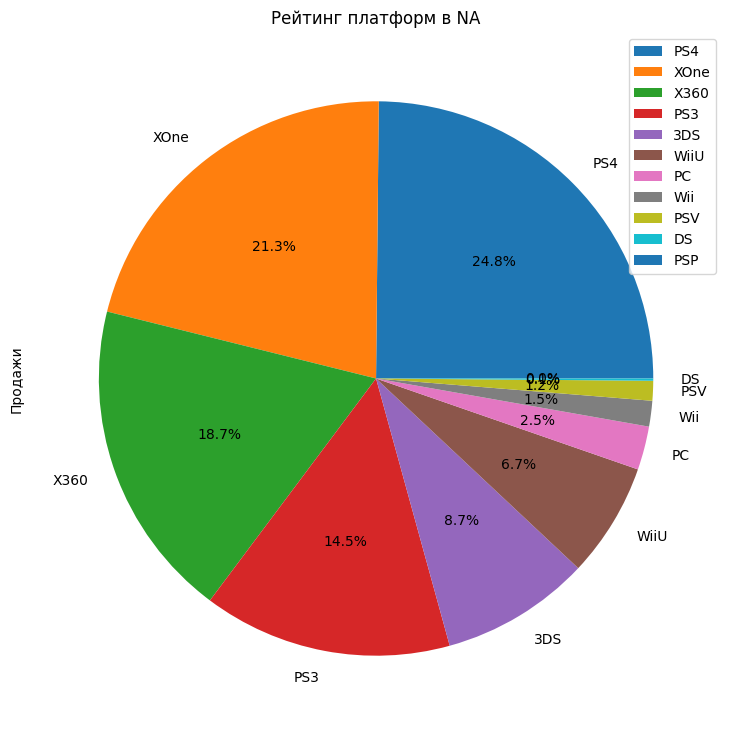

In [28]:
top_platforms_na = (new_data.pivot_table(index='platform', values='na_sales', aggfunc= 'sum')
                 .sort_values(by='na_sales', ascending=False).reset_index())
print(top_platforms_na.iloc[0:5])
(new_data.pivot_table(index='platform', values='na_sales', aggfunc= 'sum').sort_values(by='na_sales', ascending=False)
 .plot(kind='pie', y='na_sales', figsize=(9,9), title='NA', autopct='%1.1f%%')
)

plt.title('Рейтинг платформ в NA')
plt.ylabel('Продажи')

plt.show()

  platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96


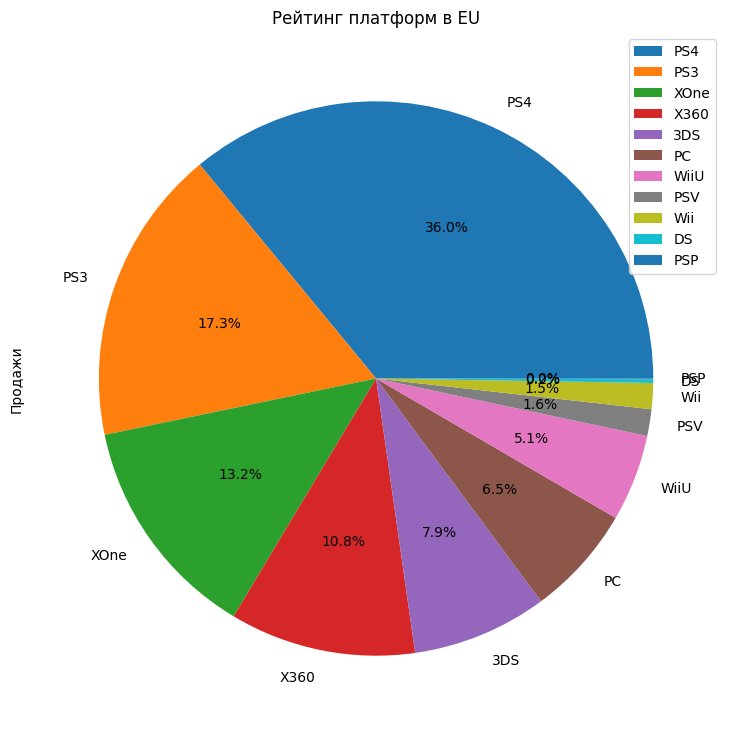

In [29]:
top_platforms_eu = (new_data.pivot_table(index='platform', values='eu_sales', aggfunc= 'sum')
                 .sort_values(by='eu_sales', ascending=False).reset_index())
print(top_platforms_eu.iloc[0:5])
(new_data.pivot_table(index='platform', values='eu_sales', aggfunc= 'sum').sort_values(by='eu_sales', ascending=False)
 .plot(kind='pie', y='eu_sales', figsize=(9,9), autopct='%1.1f%%')
)

plt.title('Рейтинг платформ в EU')
plt.ylabel('Продажи')

plt.show()

  platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88


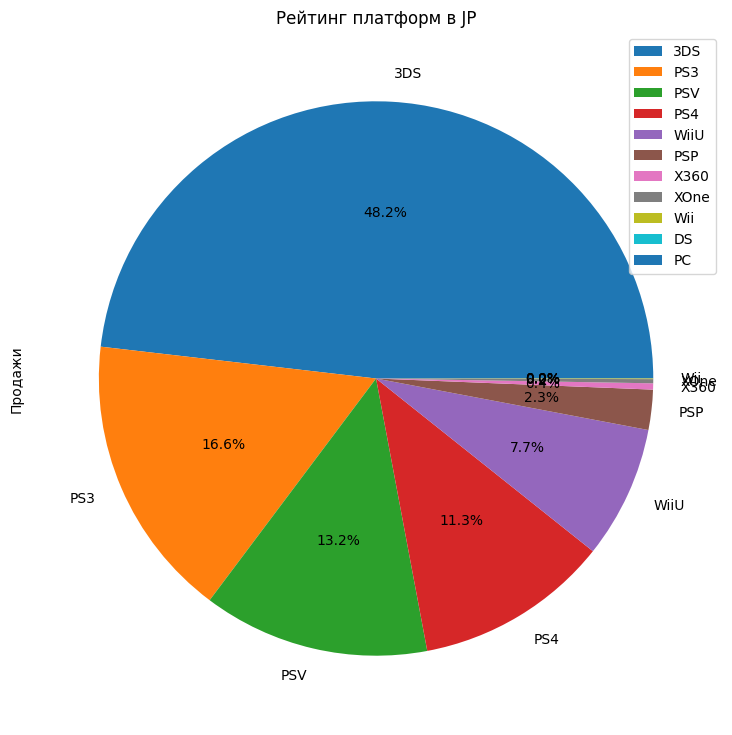

In [30]:
top_platforms_jp = (new_data.pivot_table(index='platform', values='jp_sales', aggfunc= 'sum')
                 .sort_values(by='jp_sales', ascending=False).reset_index())
print(top_platforms_jp.iloc[0:5])
(new_data.pivot_table(index='platform', values='jp_sales', aggfunc= 'sum').sort_values(by='jp_sales', ascending=False)
 .plot(kind='pie', y='jp_sales', figsize=(9,9), autopct='%1.1f%%')
)

plt.title('Рейтинг платформ в JP')
plt.ylabel('Продажи')

plt.show()

Самые большие продажи в Северной Америке, затем в Европе. При этом списки топ-5 платформ в Северной Америке и Европе практически не отличаются. В Японии же популярнее всего местная платформа 3DS. 

#### Рейтинг жанров по регионам 

          genre  na_sales
0        Action    126.05
1       Shooter    109.74
2        Sports     65.27
3  Role-Playing     46.40
4          Misc     27.49


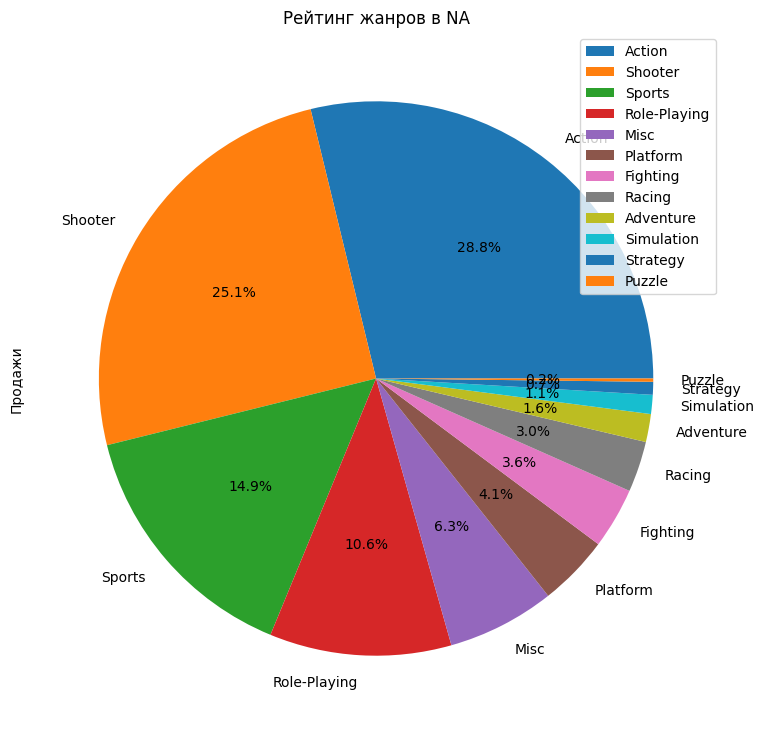

In [31]:
top_genre_na = (new_data.pivot_table(index='genre', values='na_sales', aggfunc= 'sum')
                 .sort_values(by='na_sales', ascending=False).reset_index())
print(top_genre_na.iloc[0:5])
(new_data.pivot_table(index='genre', values='na_sales', aggfunc= 'sum').sort_values(by='na_sales', ascending=False)
 .plot(kind='pie', y='na_sales', figsize=(9,9), autopct='%1.1f%%')
)

plt.title('Рейтинг жанров в NA')
plt.ylabel('Продажи')

plt.show()

          genre  eu_sales
0        Action    118.13
1       Shooter     87.86
2        Sports     60.52
3  Role-Playing     36.97
4        Racing     20.19


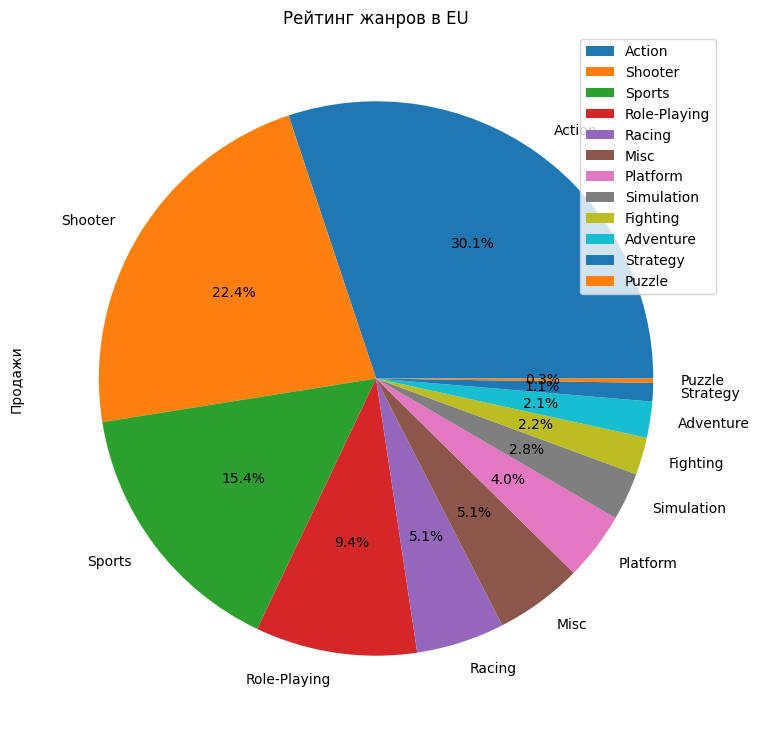

In [32]:
top_genre_eu = (new_data.pivot_table(index='genre', values='eu_sales', aggfunc= 'sum')
                 .sort_values(by='eu_sales', ascending=False).reset_index())
print(top_genre_eu.iloc[0:5])
(new_data.pivot_table(index='genre', values='eu_sales', aggfunc= 'sum').sort_values(by='eu_sales', ascending=False)
 .plot(kind='pie', y='eu_sales', figsize=(9,9), autopct='%1.1f%%')
)

plt.title('Рейтинг жанров в EU')
plt.ylabel('Продажи')

plt.show()

          genre  jp_sales
0  Role-Playing     51.04
1        Action     40.49
2          Misc      9.20
3      Fighting      7.65
4       Shooter      6.61


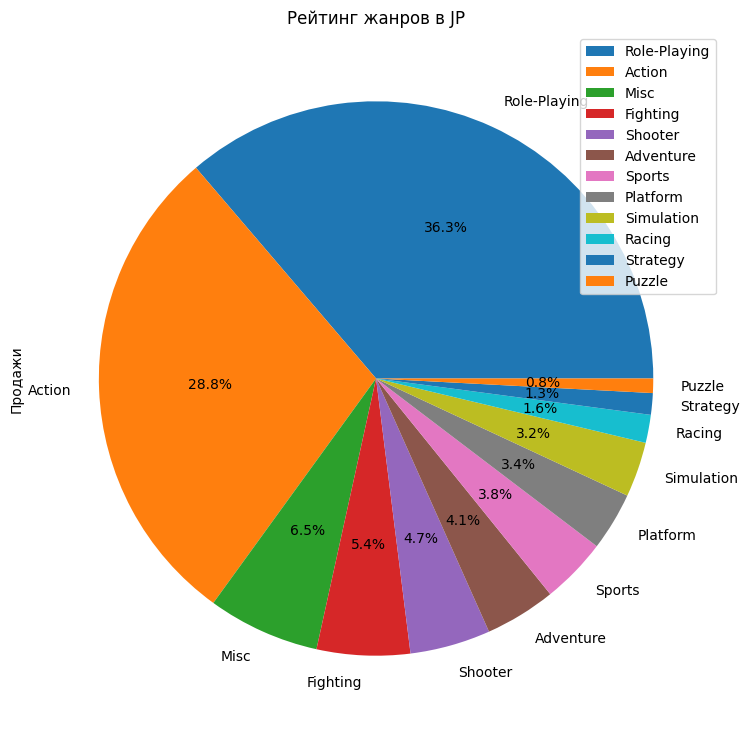

In [33]:
top_genre_jp = (new_data.pivot_table(index='genre', values='jp_sales', aggfunc= 'sum')
                 .sort_values(by='jp_sales', ascending=False).reset_index())
print(top_genre_jp.iloc[0:5])
(new_data.pivot_table(index='genre', values='jp_sales', aggfunc= 'sum').sort_values(by='jp_sales', ascending=False)
 .plot(kind='pie', y='jp_sales', figsize=(9,9), autopct='%1.1f%%')
)

plt.title('Рейтинг жанров в JP')
plt.ylabel('Продажи')

plt.show()

Жанровые предпочтения в Северной Америке и Европе также почти не отличаются -Action, Sports и Shooter. В отличие от этих регионов в Японии самый популярный жанр - Role-Playing (Ролевая игра), но и Action тоже популярен. И в отличие от Северной Америки и Европы совсем не популярен жанр  Shooter. Видимо, это связано с тем ментилитетом пользователей. Менталитет, образ жизни и интересы японцев отличаются от жителей Северной Америки и Европы. В этих же двух регионах люди похожи.

##### Влияние на продажи в регионах рейтинга ESRB

In [34]:
print(new_data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc= 'sum'))

         eu_sales  jp_sales  na_sales
rating                               
E           83.36     15.14     79.05
E10+        42.69      5.89     54.24
M          145.32     14.11    165.21
T           41.95     20.59     49.79
Unknown     78.91     85.05     89.42


Рейтинг ESRB оказывает влияние на продажи в каждом регионе.

#### Вывод

В ходе анализа в данном разделе установлено, что портреты пользователя в Северной Америке и в Европе схожи. Пользователи в данных регионах используют одни и теже платформы и играют в игры одних и тех же жанров. А вот пользователи в Японии  отличаются от пользователей Северной Америки и Европы. Также анализ показал, что в Японии больше всего продаются игры без рейтинга, потому что ESRB - это рейтинг для Северной Америки. А в Европе и Северной Америке наиболее популярны игры с рейтингом "М" («Mature» — «От 17 лет»).

### Проверка гипотез

#### Гипотеза №1:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [35]:
xbox = new_data[(new_data['platform'] == 'XOne') & (new_data['user_score']>0)]['user_score']
pc = new_data[(new_data['platform'] == 'PC') & (new_data['user_score']>0)]['user_score']

print('Средний пользовательский рейтинг Xbox One:', xbox.mean())
print('Средний пользовательский рейтинг PC:', pc.mean())

from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(xbox, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.2696774193548395
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза №2:  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

H0: средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H1: средние пользовательские рейтинги жанров Action и Sports разные.

In [36]:
action = new_data[(new_data['genre'] == 'Action') & (new_data['user_score']>0)]['user_score']
sports = new_data[(new_data['genre'] == 'Sports') & (new_data['user_score']>0)]['user_score']

print('Средний пользовательский рейтинг Action:', action.mean())
print('Средний пользовательский рейтинг Sports:', sports.mean())

from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг Action: 6.837532133676092
Средний пользовательский рейтинг Sports: 5.238124999999999
p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


#### Вывод

В данном разделе были проверены две гипотезы:   
- о равенстве пользовательских рейтингов для платформ Xbox One и PC;  
- о неравенстве пользовательских рейтингов жанров Action и Sports.

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Альтернативная гипотеза -это утверждение, которое принимается верным, если отбрасывается нулевая гипотеза. В нашем случае нулевые гипотезы были сформурованы по принципу равенства средних пользовательских рейтингов, а альтернативные гипотезы сформулированы от обратного, что средние рейтинги не равны. Для проверки этих двухсторонних гипотез использован t-тест. Мы применили этот критерий, так как у нас две большие независимые друг от друга генеральные совокупности.  
Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, а также гипотезу о неравенстве пользовательских рейтингов жанров Action и Sports отвергнуть не получилось.

### Общий вывод

Целями данного проекта являлись определение закономерностей определяющих успешность компьютерных игр.  
В данном проекте выполнены исследования успешности компьютерных игр на основании анализа исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.  
Была выполнены предобработка данных, в результате которой выявлены и устранены пропуски, где это было возможно. Далее был определен актуальный период для исследования - 2013-2016 гг.  
в результате исследовательского анализа данных за актуальный период установлено, что наиболее перспективными на 2017 год являются платформы PS4 и 3DS.  
PS4 является самой популярной платформой в Северной Америке и Европе, и также входит в топ-5 в Японии. 3DS является самой популярной платформой в Японии, и также входит в топ-5 Северной Америки и Европы.  
Наиболее перспективный жанр в Северной Америке и Европе Shooter, а рейтинг ESBR "M". В Японии же самый популярный жанр - Role-Playing. Рейтинг ESBR не применяется.
В Северной Америке и Европе при покупке игр пользователи больше ориентируются на оценки критиков, чем других пользоваталей, а в Японии одиниково смотрят, как на рейтинг критиков, так и рейтинг других пользователей.
В целом пользователи в Северной Америке и в Европе схожи в своих предпочтениях в играх и в используемых платформах, а пользователи в Японии отличаются от них.